In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Генератор
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Linear(1024, 2048),
            nn.ReLU(),
            nn.BatchNorm1d(2048),
            nn.Linear(2048, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

In [14]:
# Дискриминатор
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [19]:
# Гиперпараметры
input_dim = 1
output_dim = 1
lr = 0.0002
batch_size = 256
epochs = 10000

In [20]:
# Создание моделей, функций потерь и оптимизаторов
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(output_dim)
criterion = nn.BCELoss()
optimizer_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

In [21]:
# Генерация настоящих данных
def real_data_samples():
    x = np.random.uniform(-10, 10, size=(batch_size, input_dim))
    y = np.sin(x) / x - x / 10
    return torch.tensor(y, dtype=torch.float32)

In [22]:
# Основной цикл обучения GAN
for epoch in range(epochs):
    # Обновление дискриминатора
    optimizer_d.zero_grad()
    real_data = real_data_samples()
    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)

    z = torch.randn(batch_size, input_dim)
    fake_data = generator(z)

    real_pred = discriminator(real_data)
    fake_pred = discriminator(fake_data.detach())

    loss_real = criterion(real_pred, real_labels)
    loss_fake = criterion(fake_pred, fake_labels)
    loss_d = loss_real + loss_fake

    loss_d.backward()
    optimizer_d.step()

    # Обновление генератора
    optimizer_g.zero_grad()
    z = torch.randn(batch_size, input_dim)
    fake_data = generator(z)
    fake_pred = discriminator(fake_data)
    loss_g = criterion(fake_pred, real_labels)
    loss_g.backward()
    optimizer_g.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Эпоха [{epoch + 1}/{epochs}], Loss D: {loss_d.item():.4f}, Loss G: {loss_g.item():.4f}')

Эпоха [1000/10000], Loss D: 1.3854, Loss G: 0.6939
Эпоха [2000/10000], Loss D: 1.3860, Loss G: 0.6881
Эпоха [3000/10000], Loss D: 1.3859, Loss G: 0.6970
Эпоха [4000/10000], Loss D: 1.3858, Loss G: 0.6951
Эпоха [5000/10000], Loss D: 1.3853, Loss G: 0.6985
Эпоха [6000/10000], Loss D: 1.3857, Loss G: 0.6936
Эпоха [7000/10000], Loss D: 1.3870, Loss G: 0.6833
Эпоха [8000/10000], Loss D: 1.3872, Loss G: 0.6949
Эпоха [9000/10000], Loss D: 1.3856, Loss G: 0.6954
Эпоха [10000/10000], Loss D: 1.3863, Loss G: 0.6909


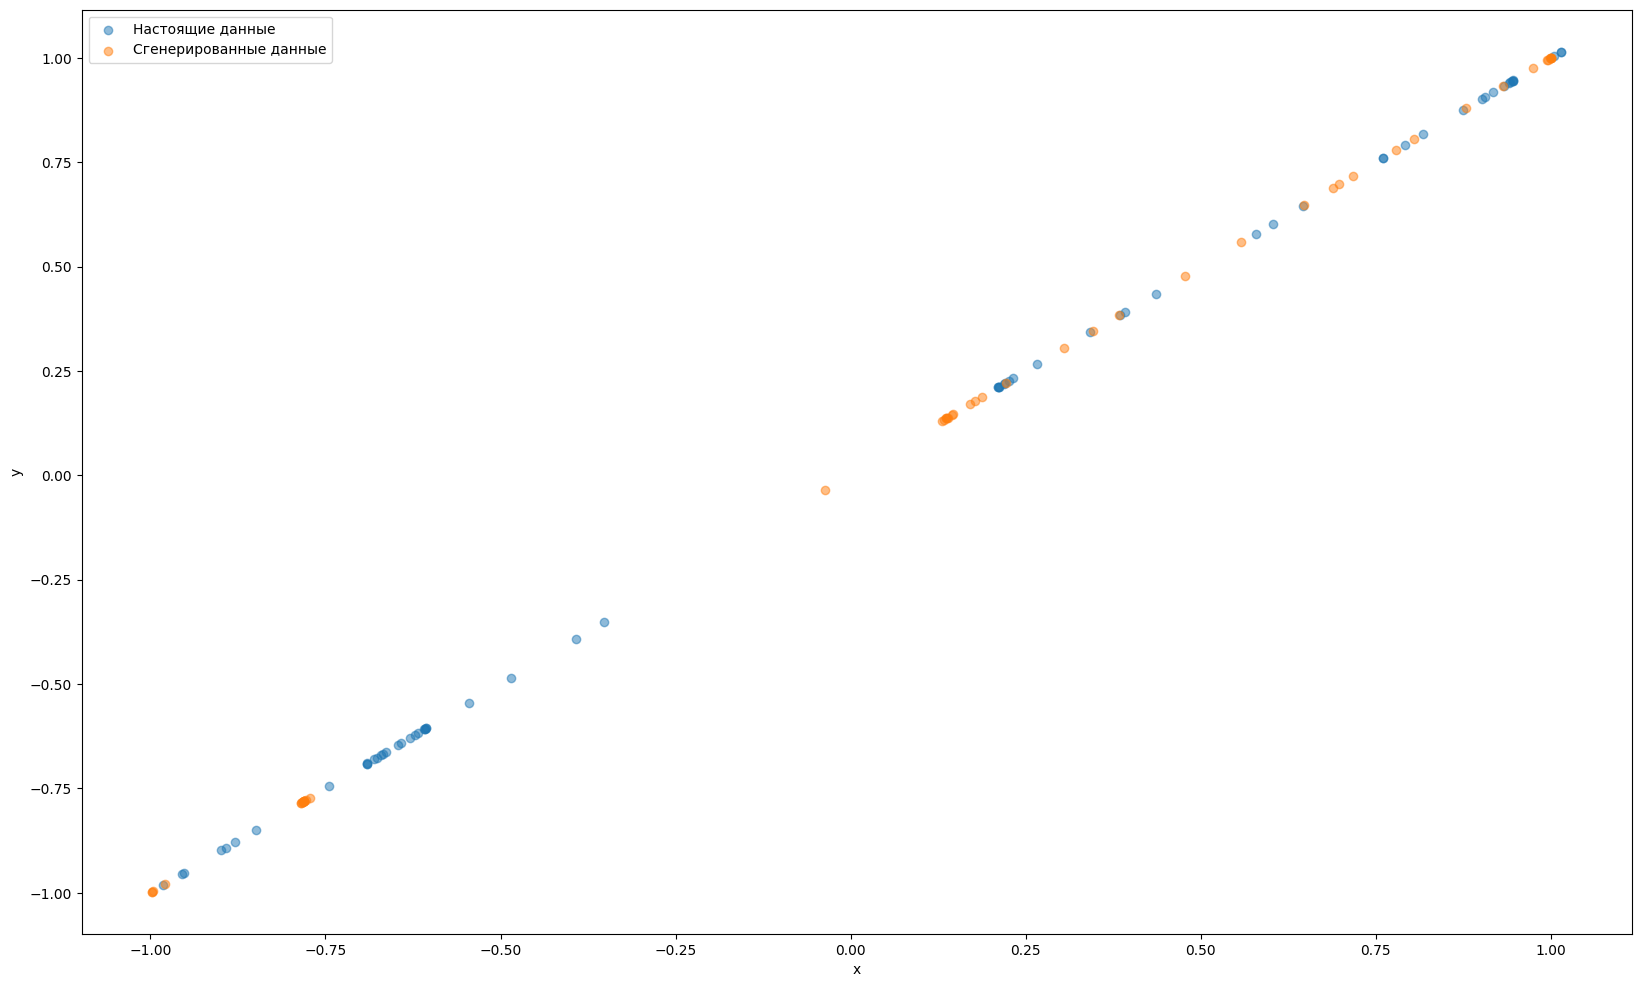

In [27]:
# Генерация и визуализация сгенерированных данных
with torch.no_grad():
    z = torch.randn(50, input_dim)
    generated_data = generator(z).detach().numpy()

plt.figure(figsize=(20, 12))
plt.scatter(real_samples, real_samples, label='Настоящие данные', alpha=0.5)
plt.scatter(generated_data, generated_data, label='Сгенерированные данные', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()